In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [8]:
# Read CSV data
data = pd.read_csv('/Users/noahbruderer/Documents/PhD/data.csv', delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the data
plt.plot(data['Date'], data['Temperature'], marker='o')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Function of Time')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'temperature_data.csv'

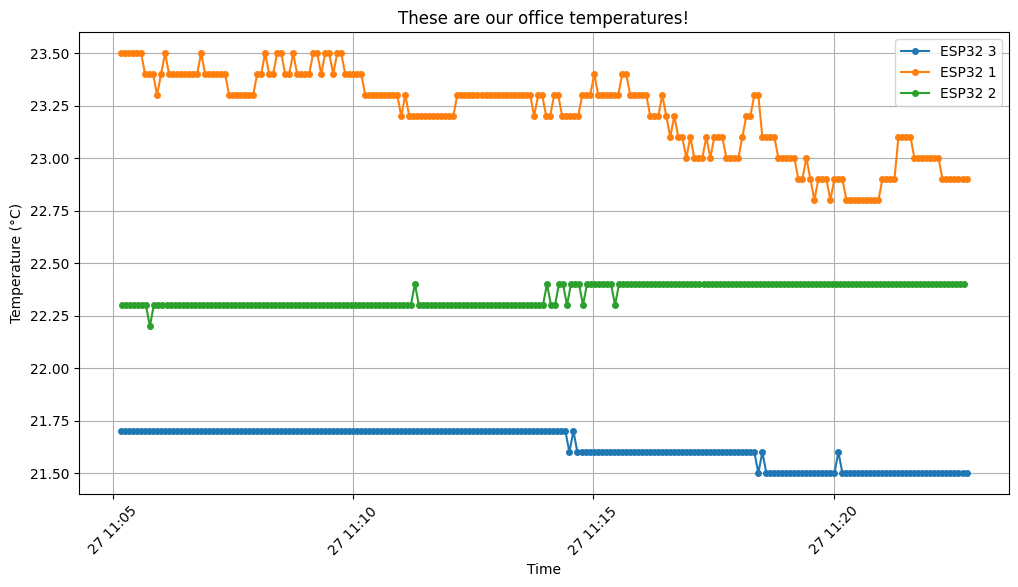

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
data = pd.read_csv('/Users/noahbruderer/Documents/PhD/data.csv', delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get the unique ESP32 numbers
unique_esp32_numbers = data['ESP32 Number'].unique()

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the data for each ESP32 number
for esp32_number in unique_esp32_numbers:
    esp32_data = data[data['ESP32 Number'] == esp32_number]
    plt.plot(esp32_data['Date'], esp32_data['Temperature'], marker='o', markersize=4, label=f'ESP32 {esp32_number}')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('These are our office temperatures!')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Display the plot
plt.show()


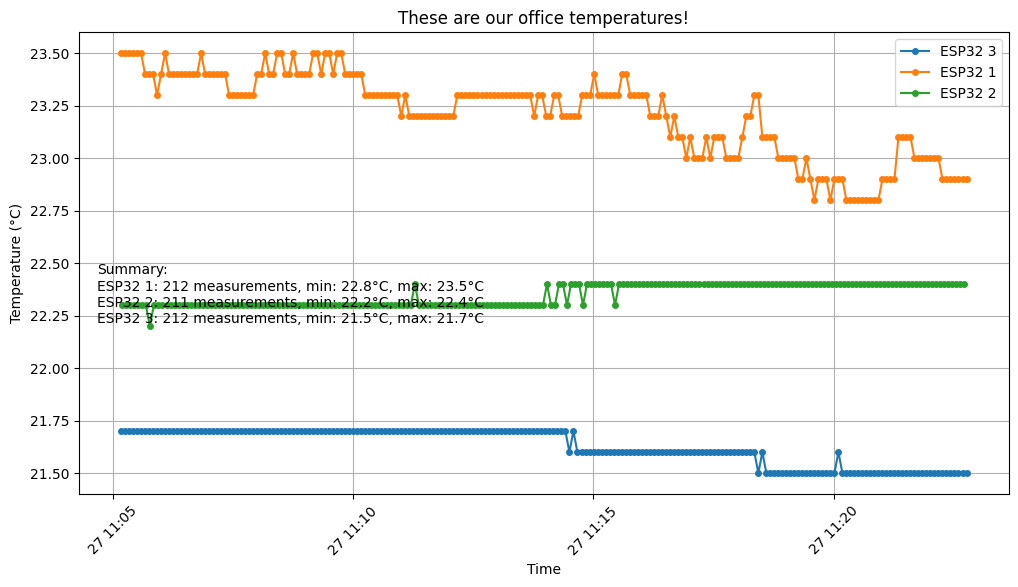

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
data = pd.read_csv('/Users/noahbruderer/Documents/PhD/data.csv', delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get the unique ESP32 numbers
unique_esp32_numbers = data['ESP32 Number'].unique()

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the data for each ESP32 number
for esp32_number in unique_esp32_numbers:
    esp32_data = data[data['ESP32 Number'] == esp32_number]
    plt.plot(esp32_data['Date'], esp32_data['Temperature'], marker='o', markersize=4, label=f'ESP32 {esp32_number}')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('These are our office temperatures!')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Display the summary
summary = data.groupby('ESP32 Number')['Temperature'].agg(['count', 'min', 'max']).reset_index()
summary_text = "Summary:\n"

for index, row in summary.iterrows():
    summary_text += f"ESP32 {int(row['ESP32 Number'])}: {int(row['count'])} measurements, min: {row['min']}°C, max: {row['max']}°C\n"

plt.text(0.02, 0.5, summary_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Display the plot
plt.show()


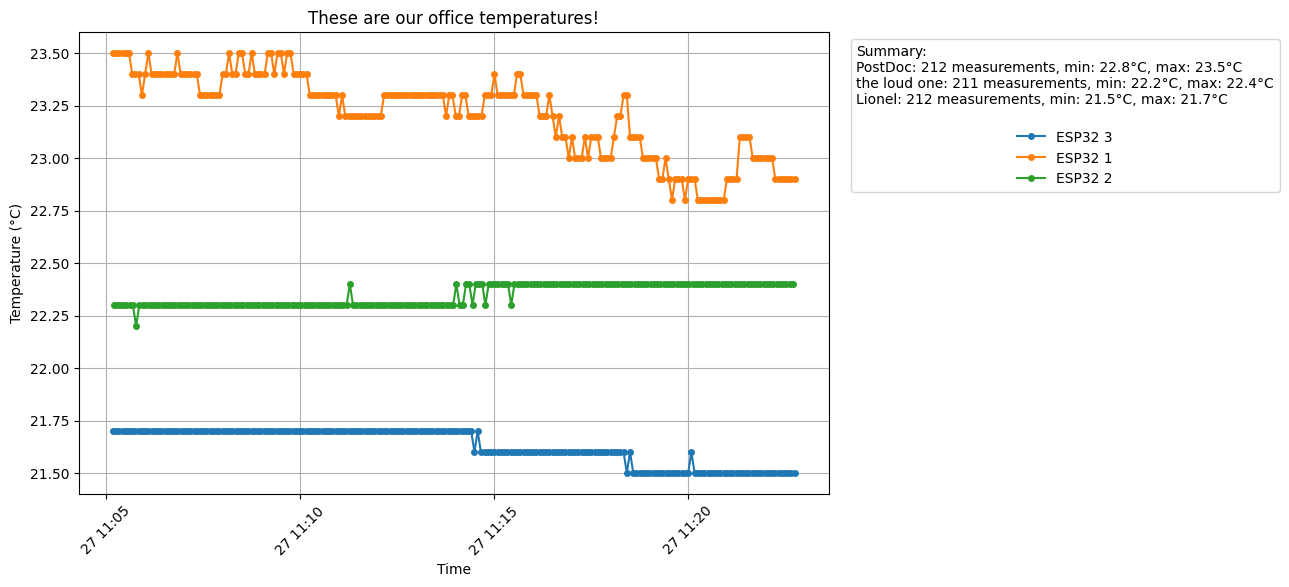

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
data = pd.read_csv('/Users/noahbruderer/Documents/PhD/data.csv', delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get the unique ESP32 numbers
unique_esp32_numbers = data['ESP32 Number'].unique()

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each ESP32 number
for esp32_number in unique_esp32_numbers:
    esp32_data = data[data['ESP32 Number'] == esp32_number]
    ax.plot(esp32_data['Date'], esp32_data['Temperature'], marker='o', markersize=4, label=f'ESP32 {esp32_number}')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('These are our office temperatures!')
plt.xticks(rotation=45)
ax.grid()

# Display the summary
summary = data.groupby('ESP32 Number')['Temperature'].agg(['count', 'min', 'max']).reset_index()

# Create a dictionary with custom labels for each ESP32 number
esp32_labels = {1: "PostDoc", 2: "the loud one", 3: "Lionel"}

summary_text = "Summary:\n"

for index, row in summary.iterrows():
    esp32_number = int(row['ESP32 Number'])
    label = esp32_labels.get(esp32_number, f"ESP32 {esp32_number}")
    summary_text += f"{label}: {int(row['count'])} measurements, min: {row['min']}°C, max: {row['max']}°C\n"

# Place the summary outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, title=summary_text)

# Adjust the layout
plt.subplots_adjust(right=0.75)

# Display the plot
plt.show()


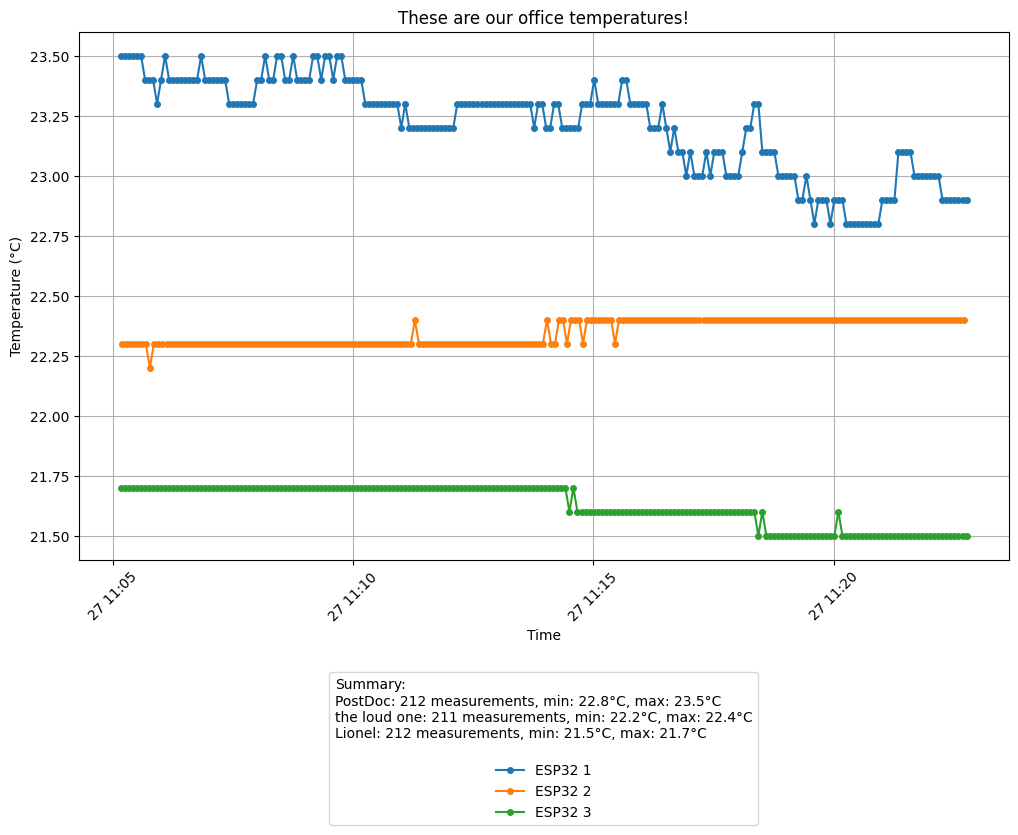

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
data = pd.read_csv('/Users/noahbruderer/Documents/PhD/data.csv', delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get the unique ESP32 numbers and sort them
unique_esp32_numbers = sorted(data['ESP32 Number'].unique())

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each ESP32 number
for esp32_number in unique_esp32_numbers:
    esp32_data = data[data['ESP32 Number'] == esp32_number]
    ax.plot(esp32_data['Date'], esp32_data['Temperature'], marker='o', markersize=4, label=f'ESP32 {esp32_number}')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('These are our office temperatures!')
plt.xticks(rotation=45)
ax.grid()

# Display the summary
summary = data.groupby('ESP32 Number')['Temperature'].agg(['count', 'min', 'max']).reset_index()

# Create a dictionary with custom labels for each ESP32 number
esp32_labels = {1: "PostDoc", 2: "the loud one", 3: "Lionel"}

summary_text = "Summary:\n"

for index, row in summary.iterrows():
    esp32_number = int(row['ESP32 Number'])
    label = esp32_labels.get(esp32_number, f"ESP32 {esp32_number}")
    summary_text += f"{label}: {int(row['count'])} measurements, min: {row['min']}°C, max: {row['max']}°C\n"

# Place the summary below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1, fontsize=10, title=summary_text)

# Adjust the layout
plt.subplots_adjust(bottom=0.0)

# Display the plot
plt.show()


/var/folders/5z/crw_cmx12w9_9m589xkz8x6c0000gn/T/ipykernel_11717/45076488.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_esp32_numbers))


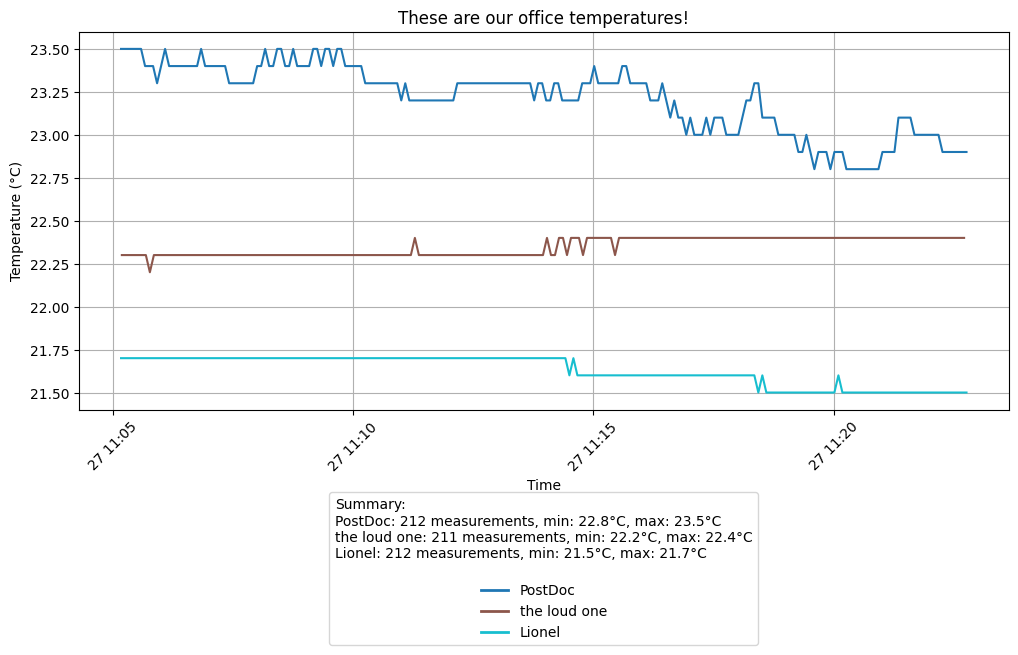

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read CSV data
data = pd.read_csv('/Users/noahbruderer/Documents/PhD/data.csv', delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get the unique ESP32 numbers and sort them
unique_esp32_numbers = sorted(data['ESP32 Number'].unique())

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each ESP32 number
colors = plt.cm.get_cmap('tab10', len(unique_esp32_numbers))
for idx, esp32_number in enumerate(unique_esp32_numbers):
    esp32_data = data[data['ESP32 Number'] == esp32_number]
    ax.plot(esp32_data['Date'], esp32_data['Temperature'], color=colors(idx))

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('These are our office temperatures!')
plt.xticks(rotation=45)
ax.grid()

# Display the summary
summary = data.groupby('ESP32 Number')['Temperature'].agg(['count', 'min', 'max']).reset_index()

# Create a dictionary with custom labels for each ESP32 number
esp32_labels = {1: "PostDoc", 2: "the loud one", 3: "Lionel"}

summary_text = "Summary:\n"

# Create custom legend elements
legend_elements = []

for idx, row in summary.iterrows():
    esp32_number = int(row['ESP32 Number'])
    label = esp32_labels.get(esp32_number, f"ESP32 {esp32_number}")
    summary_text += f"{label}: {int(row['count'])} measurements, min: {row['min']}°C, max: {row['max']}°C\n"
    legend_elements.append(Line2D([0], [0], color=colors(idx), lw=2, label=label))

# Place the custom legend next to the corresponding label in the summary
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1, fontsize=10, title=summary_text)

# Adjust the layout
plt.subplots_adjust(bottom=0.25)

# Display the plot
plt.show()


In [17]:
data

,Experiment Name,Date,ESP32 Number,Number of Reads,Temperature
0,Bigtest,2023-04-27 11:05:10,3,1,21.7
1,Bigtest,2023-04-27 11:05:10,1,1,23.5
2,Bigtest,2023-04-27 11:05:11,2,1,22.3
3,Bigtest,2023-04-27 11:05:15,3,2,21.7
4,Bigtest,2023-04-27 11:05:15,1,2,23.5
...,...,...,...,...,...
630,Bigtest,2023-04-27 11:22:41,3,211,21.5
631,Bigtest,2023-04-27 11:22:41,1,211,22.9
632,Bigtest,2023-04-27 11:22:43,2,211,22.4
633,Bigtest,2023-04-27 11:22:46,3,212,21.5
